# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json 
import pandas as pd 
import numpy as np 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

# Original likelihood plots 

In [58]:
import numpy as np 
import logging 

logger = logging.getLogger().setLevel(logging.ERROR)
seed = 1237 
measurement_model = "earth"


#Generate some data
P    = SystemParameters(h=1e-12,σp=None,σm=1e-11,measurement_model=measurement_model,seed=seed)       #define the system parameters as a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data
def iterate_over_iota(h_guess,iota_guess,measurement_model,seed):

    #Define the model 
    model = LinearModel(P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    # Run the KFwith the correct parameters
    true_parameters = priors_dict(PTA,P)
  
    true_parameters["iota_gw"] = np.array([iota_guess])
    true_parameters["h"] = np.array([h_guess])
    model_likelihood  = KF.likelihood(true_parameters)


    return model_likelihood


NN = 10
iota_values = np.linspace(0.0,np.pi/2,NN)
#h_values = np.linspace(-13,-11,NN)
h_values = np.logspace(-13,-11,NN)



print(len(h_values))
print(len(iota_values))

surface_pulsar = np.zeros((len(iota_values), len(h_values)))


print("Starting iteration")

for i in range(len(iota_values)):
    for j in range(len(h_values)):
        surface_pulsar[i,j] = iterate_over_iota(h_values[j],iota_values[i],measurement_model=measurement_model,seed=seed)







50
50
Starting iteration
chi vals are =  [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]
chi vals are =  [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.321

In [59]:
print("Saving outputs")
outfile = f'../data/sandbox_2d_surface.npz'
np.savez(outfile, x=iota_values, y=h_values,z=surface_pulsar)

Saving outputs


1.2648552168552957e-12 1.0578832404945222


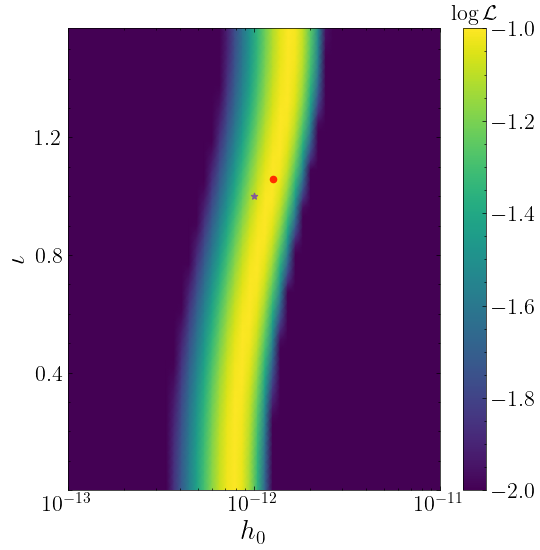

In [62]:
import numpy as np
from matplotlib import ticker, cm
import matplotlib.pyplot as plt 
import scienceplots
import matplotlib

plt.style.use('science')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


def load_and_plot(path,ax):


    #Load the data
    data = np.load(path)
    iota_values = data['x']
    h_values = data['y']
    surface_pulsar = data['z'] 
    surface_pulsar = surface_pulsar / np.abs(np.max(surface_pulsar)) #Normalize

    #Extract location of maxima
    iota_idx, h_idx = np.unravel_index(surface_pulsar.argmax(), surface_pulsar.shape)
    xc = iota_values[iota_idx]
    yc = h_values[h_idx]
    zc = surface_pulsar[iota_idx,h_idx]


    #Cast to 2D mesh
    X,Y = np.meshgrid(h_values,iota_values)
    lx = len(iota_values)
    ly = len(h_values)
    z = np.reshape(surface_pulsar, (lx, ly))



    #Plot colormap
    CS = ax.pcolormesh(X, Y, z,clim=(2.0*np.max(surface_pulsar), np.max(surface_pulsar)),shading='gouraud',cmap='viridis')
    clb = plt.colorbar(CS)



    #Config
    ax.set_xscale('log')
    ax.scatter(yc,xc, s=20,c='C3')
    print(yc,xc)
    ax.scatter(h,1.0, s=20,c='C4',marker='*')
    fs = 20
    ax.set_xlabel(r'$h_0$', fontsize=fs)
    ax.set_ylabel(r'$\iota$', fontsize=fs)
    ax.xaxis.set_tick_params(labelsize=fs-4)
    ax.yaxis.set_tick_params(labelsize=fs-4)
    clb.ax.tick_params(labelsize=fs-4) 
    clb.ax.set_title(r'$\log \mathcal{L}$',fontsize=fs-4)
    savefig = 'likelihood_surface'
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    plt.setp(ax.get_yticklabels()[0], visible=False)   #no 0th label to prevent overlap  
    #plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)


path_to_earth_model = outfile
load_and_plot(path_to_earth_model,ax)
plt.show()

In [63]:
#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)




true_parameters["iota_gw"] = np.array([1.0578832404945222])
true_parameters["h"] = np.array([1.2648552168552957e-12 ])
model_likelihood  = KF.likelihood(true_parameters)

In [64]:
model_likelihood

445982.8744095553

In [67]:
path = f'../data/sandbox_2d_surface.npz'

data = np.load(path)
iota_values = data['x']
h_values = data['y']
surface_pulsar = data['z'] 

In [68]:
np.max(surface_pulsar)

-586119.677699998

In [65]:
#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)




true_parameters["iota_gw"] = np.array([1.0])
true_parameters["h"] = np.array([1e-12 ])
model_likelihood  = KF.likelihood(true_parameters)

In [66]:
model_likelihood

585634.745217352

# Likelihood curves 

In [111]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 



#Function to create synthetic data
def create_synthetic_data(h,measurement_noise,seed):

    P    = SystemParameters(h=h,σp=None,σm=measurement_noise,seed=seed)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return P,PTA,data

#Fit model to data and return likelihood
def get_likelihood(data,iota_value,h_value,P,PTA,measurement_model):

    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the
    guessed_parameters = priors_dict(_PTA,_P) #These are the true parameters 

    guessed_parameters['iota_gw'] = np.array([iota_value])
    guessed_parameters['h'] = np.array([h_value])
    
    model_likelihood = KF.likelihood(guessed_parameters)

    return model_likelihood



h = 1e-12
measurement_noise = 1e-15
seed=1236
P,PTA,data = create_synthetic_data(h,measurement_noise,seed)


import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)


#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
N = 100

h_range = np.arange(0.5e-12,1.5e-12,1e-14)
#h_range = np.logspace(np.log10(h)-0.5,np.log10(h)+0.5,N)
iota_range = np.arange(0.8,1.2,0.01)

likelihood_curves = np.zeros((len(iota_range),len(h_range)))             


for i,iota in enumerate(iota_range):
    for j,hval in enumerate(h_range):
        likelihood_curves[i,j] = get_likelihood(data,iota,hval,P,PTA,measurement_model)



chi vals are =  [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]


Likelihood maxima occurs at:  1.1199999999999972e-12 1.1700000000000004


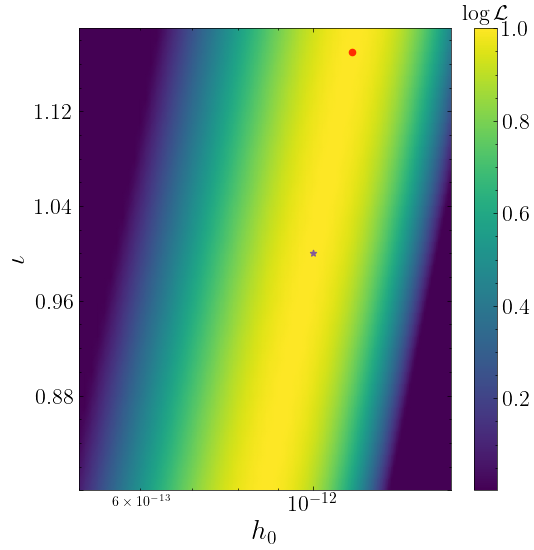

In [110]:
plt.style.use('science')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


#Load the data
#data = np.load(path)
iota_values = iota_range
h_values = h_range
surface_pulsar = likelihood_curves
surface_pulsar = surface_pulsar / np.abs(np.max(surface_pulsar)) #Normalize

#Extract location of maxima
iota_idx, h_idx = np.unravel_index(surface_pulsar.argmax(), surface_pulsar.shape)
xc = iota_values[iota_idx]
yc = h_values[h_idx]
zc = surface_pulsar[iota_idx,h_idx]

#Cast to 2D mesh
X,Y = np.meshgrid(h_values,iota_values)
lx = len(iota_values)
ly = len(h_values)
z = np.reshape(surface_pulsar, (lx, ly))



#Plot colormap
CS = ax.pcolormesh(X, Y, z,clim=(0.001*np.max(surface_pulsar), np.max(surface_pulsar)),shading='gouraud',cmap='viridis')
#CS = ax.pcolormesh(X, Y, z,clim=(np.min(surface_pulsar), np.max(surface_pulsar)),shading='gouraud',cmap='viridis')

clb = plt.colorbar(CS)



#Config
ax.set_xscale('log')
ax.scatter(yc,xc, s=20,c='C3')
print("Likelihood maxima occurs at: ", yc,xc)
ax.scatter(h,1.0, s=20,c='C4',marker='*')
fs = 20
ax.set_xlabel(r'$h_0$', fontsize=fs)
ax.set_ylabel(r'$\iota$', fontsize=fs)
ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)
clb.ax.tick_params(labelsize=fs-4) 
clb.ax.set_title(r'$\log \mathcal{L}$',fontsize=fs-4)
savefig = 'likelihood_surface'
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.setp(ax.get_yticklabels()[0], visible=False)   #no 0th label to prevent overlap  
plt.savefig('h12')

In [107]:
np.max(likelihood_curves)

586517.0165826669

In [108]:
get_likelihood(data,1.0,1e-12,P,PTA,measurement_model)

586513.7179582866

In [78]:
get_likelihood(data,xc,yc,P,PTA,measurement_model)

585638.0439687793

# Single parameter 

In [ ]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 



#Function to create synthetic data
def create_synthetic_data(h,measurement_noise,seed):

    P    = SystemParameters(h=h,σp=None,σm=measurement_noise,seed=seed)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return P,PTA,data

#Fit model to data and return likelihood
def get_likelihood(data,iota_value,h_value,P,PTA,measurement_model):

    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the
    guessed_parameters = priors_dict(_PTA,_P) #These are the true parameters 

    guessed_parameters['iota_gw'] = np.array([iota_value])
    guessed_parameters['h'] = np.array([h_value])
    
    model_likelihood = KF.likelihood(guessed_parameters)

    return model_likelihood



h = 1e-12
measurement_noise = 1e-15
seed=1236
P,PTA,data = create_synthetic_data(h,measurement_noise,seed)


import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)


#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
N = 100

#h_range = np.arange(0.5e-12,1.5e-12,1e-14)
#h_range = np.logspace(np.log10(h)-0.5,np.log10(h)+0.5,N)
h_range =
iota_range = np.arange(0.8,1.2,0.01)

likelihood_curves = np.zeros((len(iota_range),len(h_range)))             


for i,iota in enumerate(iota_range):
    for j,hval in enumerate(h_range):
        likelihood_curves[i,j] = get_likelihood(data,iota,hval,P,PTA,measurement_model)



In [90]:

h = 1e-12
measurement_noise = 1e-11
seed=1236
P,PTA,data = create_synthetic_data(h,measurement_noise,seed)



correct_L = get_likelihood(data,1.0,1e-12,P,PTA,measurement_model)
wrong_L = get_likelihood(data,xc,yc,P,PTA,measurement_model)

print(wrong_L,correct_L)

chi vals are =  [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]
586517.0119618594 586513.7179582866


In [26]:
idx = np.argmax(likelihood_curves)
iota_range[idx]

1.1645423493296831

In [27]:
old_data = np.load('../data/clean/alpha_likelihood_old_method.npy') #this is generated by `notebook_for_P2.ipynb` on the manuscript_AM_revisions branch

# from plotting import plot_likelihood
# plot_likelihood(new_data[:,0],new_data[:,1],r"$\Omega$ [Hz]",log_x_axes=False,injection=1.0)

FileNotFoundError: [Errno 2] No such file or directory: '../data/clean/alpha_likelihood_old_method.npy'

# Stacked corner plot, canonical, multiple noise 

Extracting data from file:  /Users/t1/github_repos/StateSpacePTA/data/nested_sampling/large_files/figure_1_corner_plot_multiple_noise/multiple_noise_canonical_pulsar_5e-15_1262_result.json
The evidence is: 585746.750696358
The number of samples is: 17358
Variable/Injection/Median
omega_gw 500.0 499.6621095144996
phi0_gw 0.2 0.29436953332686255
psi_gw 2.5 0.8293573281437706
iota_gw 1.0 0.6347357395240529
delta_gw 1.0 0.9340500434024652
alpha_gw 1.0 2.4408127566021562
h 5.0 3.2987096615220355
-------------------------------
median psi is weird and won't match axis limits
Breaking due to weird psi
Extracting data from file:  /Users/t1/github_repos/StateSpacePTA/data/nested_sampling/large_files/figure_1_corner_plot_multiple_noise/multiple_noise_canonical_pulsar_5e-15_1318_result.json
The evidence is: 585778.0634306826
The number of samples is: 19134
Variable/Injection/Median
omega_gw 500.0 500.4947159139316
phi0_gw 0.2 0.1636360254123448
psi_gw 2.5 2.5220225667847007
iota_gw 1.0 0.83441094

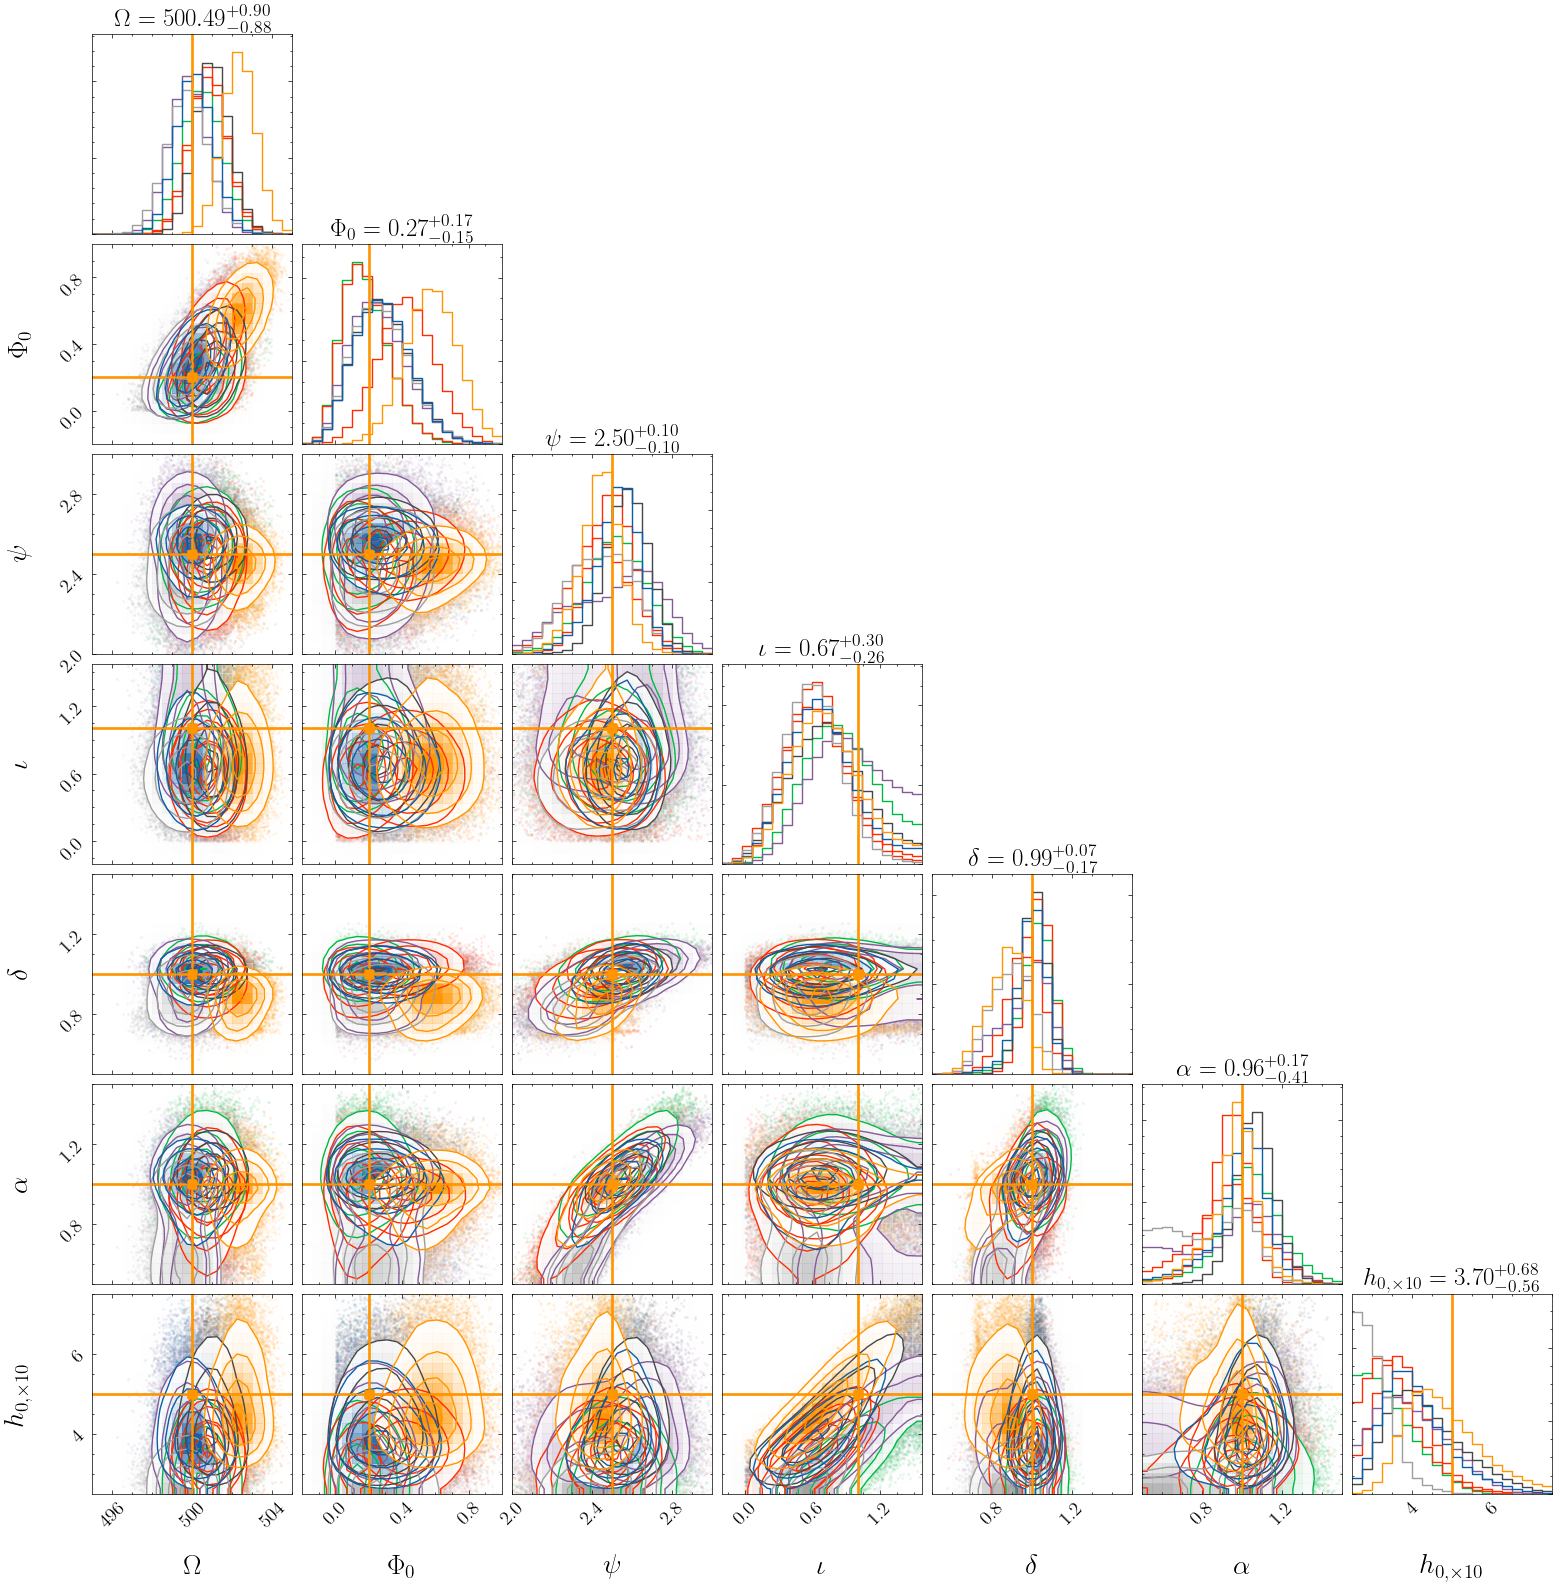

In [4]:

import glob 
from plotting import stacked_corner


#default values of GW parameters
ranges=[(4.95e-7,5.05e-7),(-0.2,1.0),(2.0,3.0),(-0.2,np.pi/2),(0.5,1.5),(0.5,1.5),(0.5*5e-15,1.5*5e-15)]
#ranges=[(4.95e-7,5.05e-7),(0.19,0.21),(2.30,2.70),(-0.2,np.pi/2),(0.5,1.5),(0.90,1.10),(0.5e-12,1.5e-12)]

#ranges = None
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,5e-15]
labels = [r'$\Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'$h_{0, \times 10}$']
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
axes_scales = None
#ranges = None
#list_of_files = glob.glob('../data/clean/rsync_folder/*.json')

#list_of_files = ['/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/large_files/figure_1_corner_plot_multiple_noise/multiple_noise_canonical_pulsar_5e-15_1279_result.json']
list_of_files = sorted(glob.glob('/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/large_files/figure_1_corner_plot_multiple_noise/*'))

number_of_files_to_plot = 10
#Corner plot of GW parameters
fig = stacked_corner(list_of_files,
                   number_of_files_to_plot,
                   variables_to_plot,
                   labels,
                   injection_parameters,
                   ranges,
                   axes_scales,
                   scalings = [1e9,1e15], #the scalings for omega and h
                   savefig='corner_lowSNR',
                   smooth=True,smooth1d=True)





